In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
from tqdm.notebook import tqdm

In [266]:
df_PER_gender = pd.read_csv(r'results/df_PER_gender.csv')

In [196]:
corpus_metadata = pd.read_csv(r'metadata/corpus_gendered.csv')

In [193]:
corpus_temp = corpus_metadata[corpus_metadata['gender']=='male']

In [198]:
len(set(corpus_metadata.auteur))

714

In [194]:
len(set(corpus_temp.auteur))

557

In [192]:
len(set(corpus_temp.auteur))

149

In [199]:
149/557

0.26750448833034113

In [195]:
len(corpus_metadata.auteur)

2960

In [70]:
row = corpus_metadata.loc[corpus_metadata['titre']=='La-force-des-choses']

In [237]:
df_PER_gender

,character,gender
0,Glady-Alberic_Male-et-femelle_<Georges-839>,Female
1,Glady-Alberic_Male-et-femelle_<Georges-912>,Female
2,Glady-Alberic_Male-et-femelle_<une maîtresse-1...,Female
3,Glady-Alberic_Male-et-femelle_<un tout petit b...,Male
4,Glady-Alberic_Male-et-femelle_<Georges-417>,Female
...,...,...
27581,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<M . ...,Male
27582,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<votr...,Male
27583,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<du c...,Male
27584,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<la c...,Female


In [239]:
corpus_metadata

,doc_name,date,auteur,titre,canon,gender,mort_auteur
0,1861_Segur-comtesse-de_Pauvre-Blaise,1861,Segur-comtesse-de,Pauvre-Blaise,False,female,1874
1,1845_Sand-George_Teverino,1845,Sand-George,Teverino,True,female,1876
2,1892_Allais-Alphonse_Vive-la-vie,1892,Allais-Alphonse,Vive-la-vie,False,male,1905
3,1997_Bergounioux-Pierre_La-ligne,1997,Bergounioux-Pierre,La-ligne,True,male,20--
4,1894_Rachilde_Le-Demon-de-l-Absurde,1894,Rachilde,Le-Demon-de-l-Absurde,False,female,1953
...,...,...,...,...,...,...,...
2955,1960_Simenon-Georges_Maigret-et-les-vieillards,1960,Simenon-Georges,Maigret-et-les-vieillards,True,male,1989
2956,1910_Zevaco-Michel_Triboulet,1910,Zevaco-Michel,Triboulet,False,male,1918
2957,1880_Gouraud-Julie_Aller-et-retour,1880,Gouraud-Julie,Aller-et-retour,False,female,1891
2958,1956_Sagan-Françoise_Un-certain-sourire,1956,Sagan-Françoise,Un-certain-sourire,False,female,2004


In [240]:
list_PER = list(df_PER_gender.character)
list_gender_PER = list(df_PER_gender.gender)
list_titre = [elem.split('_')[1] for elem in list_PER]

In [243]:
len(list_titre)

27586

In [249]:
list_titre

['Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Male-et-femelle',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Le-drame-de-la-rue-de-la-paix',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine',
 'Ctesse-de-Mirabea

In [267]:
def get_df_per_author_gender_date(df_metadata, df_PER_gender):
    list_PER = list(df_PER_gender.character)
    list_gender_PER = list(df_PER_gender.gender)
    list_titre = [elem.split('_')[1] for elem in list_PER]
    list_author = [elem.split('_')[0] for elem in list_PER]
    print(len(list_PER))
    list_date = []
    list_gender_author = []
    
    for i in tqdm(range(len(list_titre))):
        if list_titre[i] in list(df_metadata.titre):
            row_same_titre = df_metadata.loc[(df_metadata['titre']==list_titre[i]) & (df_metadata['auteur']==list_author[i])]
            list_date.append(int(row_same_titre['date'].values[0]))
            list_gender_author.append(row_same_titre['gender'].values[0])
        else:
            print(list_titre[i])

    df_per_corpus = pd.DataFrame(zip(list_PER, list_gender_PER, list_date, list_gender_author), columns=['character', "gender_PER", 'date', 'gender_AUTHOR'])
    
    return df_per_corpus

In [268]:
df_per_corpus = get_df_per_author_gender_date(corpus_metadata, df_PER_gender)

27586


  0%|          | 0/27586 [00:00<?, ?it/s]

27586
27586


In [316]:
df_per_corpus

,character,gender_PER,date,gender_AUTHOR
0,Glady-Alberic_Male-et-femelle_<Georges-839>,Female,1876,male
1,Glady-Alberic_Male-et-femelle_<Georges-912>,Female,1876,male
2,Glady-Alberic_Male-et-femelle_<une maîtresse-1...,Female,1876,male
3,Glady-Alberic_Male-et-femelle_<un tout petit b...,Male,1876,male
4,Glady-Alberic_Male-et-femelle_<Georges-417>,Female,1876,male
...,...,...,...,...
27581,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<M . ...,Male,1878,male
27582,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<votr...,Male,1878,male
27583,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<du c...,Male,1878,male
27584,Boisgobey-Fortune-du_Le-crime-de-l-Opera_<la c...,Female,1878,male


In [270]:
df_per_corpus.to_csv(r'results/df_PER_gender_dated.csv', index = True)

In [80]:
df_per_corpus

,character,gender_PER,date,gender_AUTHOR
0,Glady-Alberic_Male-et-femelle_<Georges-839>,Female,1876,male
1,Glady-Alberic_Male-et-femelle_<Georges-912>,Female,1876,male
2,Glady-Alberic_Male-et-femelle_<une maîtresse-1...,Female,1876,male
3,Glady-Alberic_Male-et-femelle_<un tout petit b...,Male,1876,male
4,Glady-Alberic_Male-et-femelle_<Georges-417>,Female,1876,male
...,...,...,...,...
27523,Feval-Paul_Les-Compagnons-du-Silence_<Barbe Sp...,Female,1878,male
27524,Feval-Paul_Les-Compagnons-du-Silence_<Johann-3...,Male,1878,male
27525,Feval-Paul_Les-Compagnons-du-Silence_<La perso...,Male,1878,male
27526,Balzac-Honore-de_Jesus-Christ-en-Flandre_<!Une...,Female,1878,male


<AxesSubplot:xlabel='gender_AUTHOR', ylabel='count'>

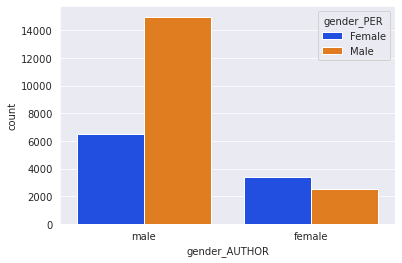

In [329]:
sns.countplot(x ='gender_AUTHOR', data = df_per_corpus, hue='gender_PER', palette = "bright")

In [320]:
df_per_corpus.gender_PER.value_counts()

Male      17604
Female     9982
Name: gender_PER, dtype: int64

In [321]:
df_per_corpus.gender_PER.value_counts(normalize=True)

Male      0.63815
Female    0.36185
Name: gender_PER, dtype: float64

In [324]:
df_female.gender_PER.value_counts(normalize=True)

Female    0.572586
Male      0.427414
Name: gender_PER, dtype: float64

In [326]:
df_female.gender_PER.value_counts()

Female    3392
Male      2532
Name: gender_PER, dtype: int64

In [325]:
df_male.gender_PER.value_counts(normalize=True)

Male      0.696448
Female    0.303552
Name: gender_PER, dtype: float64

In [327]:
df_male.gender_PER.value_counts()

Male      14982
Female     6530
Name: gender_PER, dtype: int64

<AxesSubplot:xlabel='gender_AUTHOR', ylabel='count'>

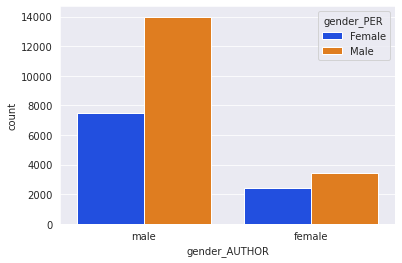

In [150]:
sns.countplot(x ='gender_AUTHOR', data = df_per_corpus, hue='gender_PER', palette = "bright")

<AxesSubplot:xlabel='gender', ylabel='count'>

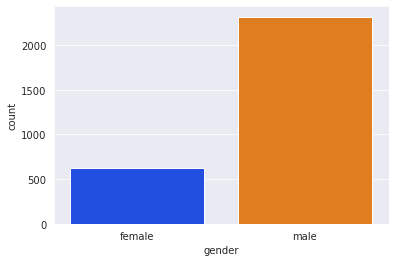

In [219]:
sns.countplot(x ='gender', data = corpus_metadata, palette = "bright")

In [322]:
df_male = df_per_corpus[df_per_corpus['gender_AUTHOR']== 'male']

In [159]:
df_male.gender_PER.value_counts()[1]/(df_male.gender_PER.value_counts()[0]+df_male.gender_PER.value_counts()[1])

0.348280041017992

In [323]:
df_female = df_per_corpus[df_per_corpus['gender_AUTHOR']== 'female']

In [158]:
df_female.gender_PER.value_counts()[1]/(df_female.gender_PER.value_counts()[0]+df_female.gender_PER.value_counts()[1])

0.41441593517893316

In [271]:
def gender_decades(list_dates, list_gender):
    list_decades, list_nbmale_decades,  list_nbfemale_decades, list_decades_vues, list_female_pourcentage = [], [], [], [], []
    conteur_male, conteur_female, i = 0, 0, 0
    for i in range(len(list_dates)):
        if list_dates[i] % 5 == 0 and len(list_decades_vues)>=1 and list_dates[i] not in list_decades_vues:#10==1
            list_decades.append(list_dates[i]-1)
            list_nbmale_decades.append(conteur_male)
            list_nbfemale_decades.append(conteur_female)
            list_decades_vues.append(list_dates[i])
            list_female_pourcentage.append(100*conteur_female/(conteur_female + conteur_male))
            conteur_female = 0
            conteur_male = 0

            
        if list_gender[i] == 'Female':
            conteur_female+=1
        else:
            conteur_male+=1
            
        if len(list_decades_vues) == 0:
            list_decades_vues.append(list_dates[i])
               
        
    return list_decades, list_female_pourcentage

In [272]:
df_per_corpus_male = df_per_corpus[df_per_corpus['gender_AUTHOR']=='male']

In [273]:
df_per_corpus_female = df_per_corpus[df_per_corpus['gender_AUTHOR']=='female']

In [301]:
list_decades, list_female_pourcentage = gender_decades(list(df_per_corpus_male.date), list(df_per_corpus_male.gender_PER))

In [302]:
zipped = list(zip(list_decades, list_female_pourcentage))

In [303]:
df_gender_repartition = pd.DataFrame(zipped, columns=["decades", "female_rate"])

In [304]:
list_decades, list_female_pourcentage = gender_decades(list(df_per_corpus_female.date), list(df_per_corpus_female.gender_PER))

In [305]:
zipped = list(zip(list_decades, list_female_pourcentage))

In [306]:
df_gender_repartition_female = pd.DataFrame(zipped, columns=["decades", "female_rate"])

In [307]:
df_gender_repartition_female.to_csv(r'results/df_gender_repartition_female.csv', index = False)

In [308]:
df_gender_repartition_female = pd.read_csv(r'results/df_gender_repartition_female.csv')

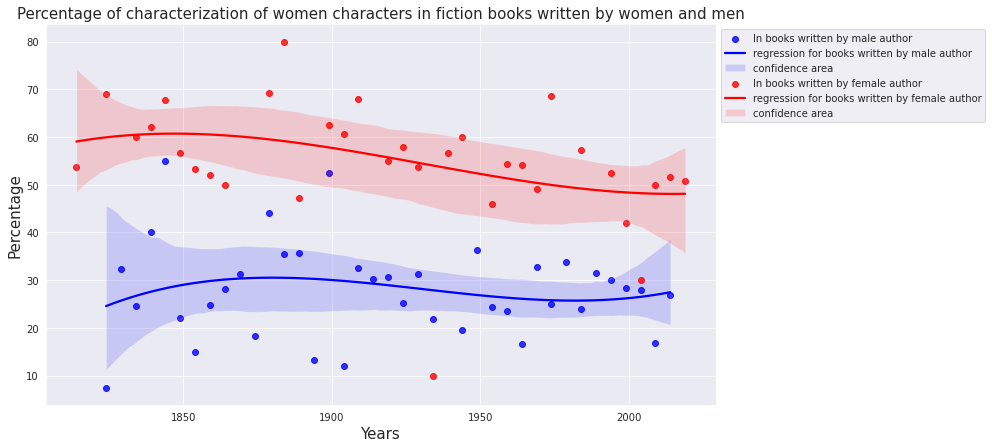

In [311]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(12, 7))
p1 = sns.regplot(data=df_gender_repartition, x='decades', y='female_rate', ax=ax, color='blue', order=3)

p2 = sns.regplot(data=df_gender_repartition_female, x='decades', y='female_rate', ax=ax, color='red', order=3)
plt.legend(labels=["In books written by male author", "regression for books written by male author", 'confidence area', 'In books written by female author', 'regression for books written by female author', 'confidence area'], loc = 2, bbox_to_anchor = (1,1))

plt.title('Percentage of characterization of women characters in fiction books written by women and men',fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()

In [160]:
def gender_year(list_dates, list_gender):
    list_year, list_nbmale_year,  list_nbfemale_year, list_year_vues, list_female_pourcentage = [], [], [], [], []
    conteur_male, conteur_female, i = 0, 0, 0
    for i in range(len(list_dates)):
        if list_dates[i] not in list_year_vues and len(list_year_vues)>=1:
            list_year_vues.append(list_dates[i])
            list_nbmale_year.append(conteur_male)
            list_nbfemale_year.append(conteur_female)
            list_female_pourcentage.append(100*conteur_female/(conteur_female + conteur_male))
            conteur_female = 0
            conteur_male = 0
        if list_gender[i] == 'Female':
            conteur_female+=1
        else:
            conteur_male+=1
        if len(list_year_vues) == 0:
            list_year_vues.append(list_dates[i])
            
        
    return list_year_vues, list_female_pourcentage

In [313]:
list_decades, list_female_pourcentage = gender_year(list(df_per_corpus_female.date), list(df_per_corpus_female.gender_PER))
zipped = list(zip(list_decades, list_female_pourcentage))
df_gender_repartition_female = pd.DataFrame(zipped, columns=["decades", "female_rate"])

In [314]:
list_decades, list_female_pourcentage = gender_year(list(df_per_corpus_male.date), list(df_per_corpus_male.gender_PER))
zipped = list(zip(list_decades, list_female_pourcentage))
df_gender_repartition_male = pd.DataFrame(zipped, columns=["decades", "female_rate"])

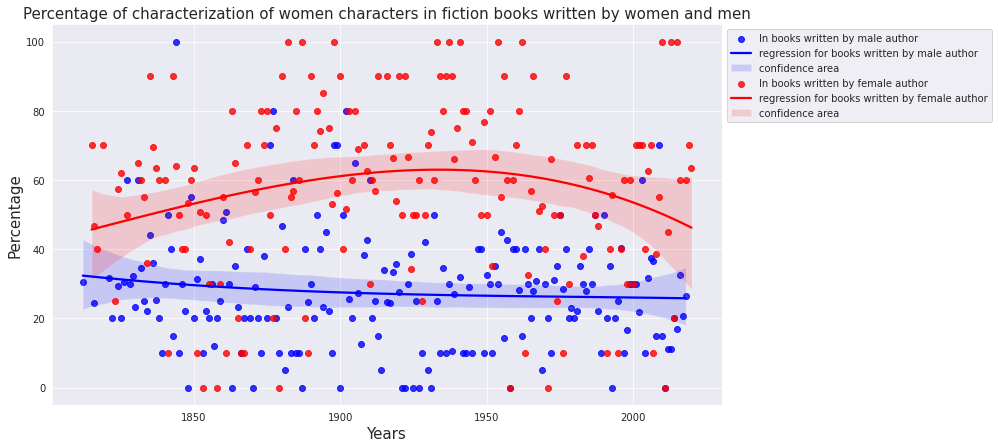

In [315]:
sns.set_style('darkgrid')
sns.set_palette('bright')
fig, ax = plt.subplots(figsize=(12, 7))
p1 = sns.regplot(data=df_gender_repartition_male, x='decades', y='female_rate', ax=ax, color='blue', order=3)

p2 = sns.regplot(data=df_gender_repartition_female, x='decades', y='female_rate', ax=ax, color='red', order=3)
plt.legend(labels=["In books written by male author", "regression for books written by male author", 'confidence area', 'In books written by female author', 'regression for books written by female author', 'confidence area'], loc = 2, bbox_to_anchor = (1,1))

plt.title('Percentage of characterization of women characters in fiction books written by women and men',fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.show()